# ITS307 Data Analytics                                                   : Spring Semester 2022
# Practical 6
# Regularization
![image.png](attachment:image.png)

# 1. Import Libraries

In [ ]:
import pandas as pd
import matplotlib as plt 
import numpy as np
from sklearn import datasets

In [ ]:
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

# 2. Load Data

In [ ]:
df = pd.DataFrame(data=boston.data,columns=boston.feature_names)
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [ ]:
X = boston.data
y = boston.target

# 3. Train test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# 4. Simple Linear Model

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
model.coef_

array([-1.11360190e-01,  4.06267477e-02,  1.43887012e-02,  2.51471898e+00,
       -1.60161129e+01,  3.82711755e+00,  3.33059232e-03, -1.51185581e+00,
        3.09504928e-01, -1.22863138e-02, -8.59353698e-01,  9.49795833e-03,
       -6.16516063e-01])

In [ ]:
model.intercept_

34.8215954447897

In [ ]:
model.score(X_train, y_train)

0.7432017867146977

In [ ]:
model.score(X_test, y_test)

0.7012280469491322

# 5. Ridge Regularization for Linear Model

**Using Ridge**

In [ ]:
from sklearn.linear_model import Ridge 
modelr = Ridge(alpha=100)   # Try to change the value of alpha to reduce overfitting, increasing the alpha may reduce the accuracy of train but increases the test accuracy
modelr.fit(X_train, y_train)
modelr.score(X_train, y_train)

0.7210149945992322

In [ ]:
modelr.score(X_test, y_test)

0.6639436118996489

# 6. Lasso Regularization for Linear Model

In [ ]:
from sklearn.linear_model import Lasso 
modelr = Lasso(alpha=0.1)   # Try to change the value of alpha to reduce overfitting, the alpha value for Lasso requires small number compared to Ridge
modelr.fit(X_train, y_train)
modelr.score(X_train, y_train)

0.7324347680670416

In [ ]:
modelr.score(X_test, y_test)

0.6711758022760472

# 7. Polynomial Regression of degree 2

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2)

xtrain_poly = pf.fit_transform(X_train)  # create xtrain with degree 2 features
xtest_poly = pf.fit_transform(X_test)

In [ ]:
lrp = LinearRegression()

lrp.fit(xtrain_poly, y_train)
lrp.score(xtrain_poly, y_train)

0.9331632220841733

In [ ]:
lrp.fit(xtest_poly, y_test)
lrp.score(xtest_poly, y_test)

0.9989144433058954

# 8. Ridge Regularization for Polynomial model

In [ ]:
modelrp = Ridge(alpha=1000000)   # Try to change the value of alpha to reduce overfitting, increasing the alpha may reduce the accuracy of train but increases the test accuracy
modelrp.fit(xtrain_poly, y_train)
modelrp.score(xtrain_poly, y_train)

0.8478277239900185

In [ ]:
modelrp.score(xtest_poly, y_test)


0.7752261836987777

# 9. Lasso Regularization for Polynomial model

In [ ]:
modelpl = Lasso(alpha=1)   # Try to change the value of alpha to reduce overfitting, increasing the alpha may reduce the accuracy of train but increases the test accuracy
modelpl.fit(xtrain_poly, y_train)
modelpl.score(xtrain_poly, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.479e+03, tolerance: 3.571e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.8809416679117045

In [ ]:
modelrp.score(xtest_poly, y_test)


0.7752261836987777

# 10. Select K Best

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

#define feature selection
kb = SelectKBest(score_func=f_regression,k=7)

#apply feature selection
X_selected = kb.fit_transform(X_train, y_train)
X_selected[0]

array([5.302e-02, 3.410e+00, 4.890e-01, 7.079e+00, 2.700e+02, 1.780e+01,
       5.700e+00])

In [ ]:
columns = ['LSTAT', 'ZN', 'INDUS', 'RM', 'TAXT', 'PTRATIO']

In [ ]:
X_selected.shape

(404, 7)

In [ ]:
lrk = LinearRegression()

lrk.fit(X_selected, y_train)

LinearRegression()

In [ ]:
lrk.score(X_selected, y_train)

0.6885981794291414

In [ ]:
X_selected = kb.fit_transform(X_test, y_test)
X_selected[0]


array([1.810e+01, 5.970e-01, 6.852e+00, 2.400e+01, 6.660e+02, 2.020e+01,
       1.978e+01])

In [ ]:
X_selected.shape


(102, 7)

In [ ]:
model = LinearRegression()

model.fit(X_selected, y_test)

LinearRegression()

In [ ]:
model.score(X_selected, y_test)


0.7719946734328761

In [ ]:
tdf = pd.DataFrame(X_test, columns=boston.feature_names)
tdf

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0    14.43830   0.0  18.10   0.0  0.597  6.852  100.0  1.4655  24.0  666.0   
1     0.01501  80.0   2.01   0.0  0.435  6.635   29.7  8.3440   4.0  280.0   
2    15.17720   0.0  18.10   0.0  0.740  6.152  100.0  1.9142  24.0  666.0   
3     0.05059   0.0   4.49   0.0  0.449  6.389   48.0  4.7794   3.0  247.0   
4    10.67180   0.0  18.10   0.0  0.740  6.459   94.8  1.9879  24.0  666.0   
..        ...   ...    ...   ...    ...    ...    ...     ...   ...    ...   
97    1.62864   0.0  21.89   0.0  0.624  5.019  100.0  1.4394   4.0  437.0   
98    0.12744   0.0   6.91   0.0  0.448  6.770    2.9  5.7209   3.0  233.0   
99    5.58107   0.0  18.10   0.0  0.713  6.436   87.9  2.3158  24.0  666.0   
100   0.09378  12.5   7.87   0.0  0.524  5.889   39.0  5.4509   5.0  311.0   
101   0.34940   0.0   9.90   0.0  0.544  5.972   76.7  3.1025   4.0  304.0   

     PTRATIO       B  LSTAT  
0       20.2  179.36  19.78  
1       17.0  390.94   5.99  
2       20.2    9.32  26.45  
3       18.5  396.90   9.62  
4       20.2   43.06  23.98  
..       ...     ...    ...  
97      21.2  396.90  34.41  
98      17.9  385.41   4.84  
99      20.2  100.19  16.22  
100     15.2  390.50  15.71  
101     18.4  396.24   9.97  

[102 rows x 13 columns]

In [ ]:
traindf = pd.DataFrame(data=X_train, columns=boston.feature_names)
traindf['target'] = y_train
traindf.head()

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0  0.05302   0.0   3.41   0.0  0.489  7.079   63.1  3.4145   2.0  270.0   
1  0.14932  25.0   5.13   0.0  0.453  5.741   66.2  7.2254   8.0  284.0   
2  4.22239   0.0  18.10   1.0  0.770  5.803   89.0  1.9047  24.0  666.0   
3  9.23230   0.0  18.10   0.0  0.631  6.216  100.0  1.1691  24.0  666.0   
4  9.92485   0.0  18.10   0.0  0.740  6.251   96.6  2.1980  24.0  666.0   

   PTRATIO       B  LSTAT  target  
0     17.8  396.06   5.70    28.7  
1     19.7  395.11  13.15    18.7  
2     20.2  353.04  14.64    16.8  
3     20.2  366.15   9.53    50.0  
4     20.2  388.52  16.44    12.6

In [ ]:
corr = traindf.corr() 
corr

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.186571  0.372338 -0.049008  0.402070 -0.203992  0.332187   
ZN      -0.186571  1.000000 -0.519115 -0.083615 -0.522569  0.303167 -0.593521   
INDUS    0.372338 -0.519115  1.000000  0.097475  0.747489 -0.386889  0.653271   
CHAS    -0.049008 -0.083615  0.097475  1.000000  0.141060  0.072868  0.113123   
NOX      0.402070 -0.522569  0.747489  0.141060  1.000000 -0.307812  0.729416   
RM      -0.203992  0.303167 -0.386889  0.072868 -0.307812  1.000000 -0.250056   
AGE      0.332187 -0.593521  0.653271  0.113123  0.729416 -0.250056  1.000000   
DIS     -0.357214  0.663026 -0.694638 -0.123225 -0.771497  0.208129 -0.762646   
RAD      0.606859 -0.305490  0.555781  0.021172  0.600729 -0.199020  0.446496   
TAX      0.558351 -0.313283  0.702179 -0.004701  0.660201 -0.284886  0.507490   
PTRATIO  0.272796 -0.390122  0.369304 -0.107942  0.184291 -0.351371  0.252406   
B       -0.372838  0.171553 -0.335147  0.041541 -0.366650  0.111954 -0.271417   
LSTAT    0.422079 -0.406002  0.573646 -0.036515  0.560554 -0.603146  0.585843   
target  -0.373474  0.334791 -0.457697  0.153473 -0.398663  0.691913 -0.358996   

              DIS       RAD       TAX   PTRATIO         B     LSTAT    target  
CRIM    -0.357214  0.606859  0.558351  0.272796 -0.372838  0.422079 -0.373474  
ZN       0.663026 -0.305490 -0.313283 -0.390122  0.171553 -0.406002  0.334791  
INDUS   -0.694638  0.555781  0.702179  0.369304 -0.335147  0.573646 -0.457697  
CHAS    -0.123225  0.021172 -0.004701 -0.107942  0.041541 -0.036515  0.153473  
NOX     -0.771497  0.600729  0.660201  0.184291 -0.366650  0.560554 -0.398663  
RM       0.208129 -0.199020 -0.284886 -0.351371  0.111954 -0.603146  0.691913  
AGE     -0.762646  0.446496  0.507490  0.252406 -0.271417  0.585843 -0.358996  
DIS      1.000000 -0.478510 -0.540518 -0.228145  0.278626 -0.468312  0.228742  
RAD     -0.478510  1.000000  0.897648  0.452778 -0.421673  0.443282 -0.345534  
TAX     -0.540518  0.897648  1.000000  0.449991 -0.420488  0.507571 -0.436131  
PTRATIO -0.228145  0.452778  0.449991  1.000000 -0.167317  0.371213 -0.487908  
B        0.278626 -0.421673 -0.420488 -0.167317  1.000000 -0.346729  0.319119  
LSTAT   -0.468312  0.443282  0.507571  0.371213 -0.346729  1.000000 -0.750427  
target   0.228742 -0.345534 -0.436131 -0.487908  0.319119 -0.750427  1.000000

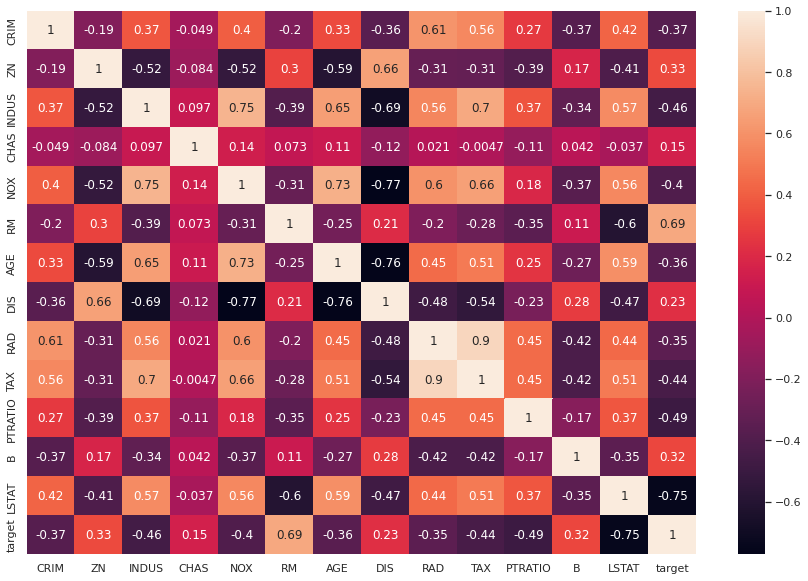

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data=corr,annot=True)
plt.show()

In [ ]:
selected_columns = ['CRIM', 'INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT']

In [ ]:
train_selected = traindf[selected_columns]
test_selected = tdf[selected_columns]
test_selected.head()

CRIM  INDUS    NOX     RM    TAX  PTRATIO  LSTAT
0  14.43830  18.10  0.597  6.852  666.0     20.2  19.78
1   0.01501   2.01  0.435  6.635  280.0     17.0   5.99
2  15.17720  18.10  0.740  6.152  666.0     20.2  26.45
3   0.05059   4.49  0.449  6.389  247.0     18.5   9.62
4  10.67180  18.10  0.740  6.459  666.0     20.2  23.98

In [ ]:
kmodel = LinearRegression()
kmodel.fit(train_selected, y_train)
kmodel.score(train_selected, y_train)


0.6885981794291414

In [ ]:
kmodel2 = LinearRegression()
kmodel2.fit(test_selected, y_test)
kmodel2.score(test_selected, y_test)

0.763991745042447

# 11. Conclusion

Why Regularization?
Regularization helps the model to generalize better so that it performs better with unseen data. Regularization introduces uncertainty or randomness to the learning algorithm, it also simplifies the neural network. Some of the regularization techniques penalize the weight metrics for


In order to reduce the problem of overfitting, we apply Regularization. Increasing the alpha may reduce the accuracy of train but increases the test accuracy or the difference between the train accuracy and test accuracy.


The hyperparameter alpha controls how much you want to regularize the model. If alpha = 0 then Ridge Regression is just Linear Regression. 

